In [1]:
from matplotlib import pyplot as plt
import numpy as np

# `TaperMixin` - Controlling onset and offset of functions

This mixin is included in every **non**-`AnalyticFunctionGenerator` classes in `letalker` to apply smooth on/off patterns both easily and flexibly.


In this demo, we employ `ConstantGenerator` class to illustrate the various effect of the `TaperMixin`.


In [2]:
import numpy as np
from letalker.function_generators import Constant
from letalker.constants import fs

The `TaperMixin` introduces 4 keyword arguments to the constructor of the supported classes:

- `transition_time: float | Sequence[float] | None = None`
- `transition_type: StepTypeLiteral | Sequence[StepTypeLiteral] = "raised_cos"`
- `transition_time_constant: float | Sequence[float] = 0.002`
- `transition_initial_on: bool = False`

Let's examine the effect of each keyword.


## `transition_time` - Time in seconds at when the transition occurs

By default the taper effect is turned off (i.e., `transition_time = None`). By assigning a time value to this argument turns on the waveform at this time.


Text(0.5, 0, 'time (s)')

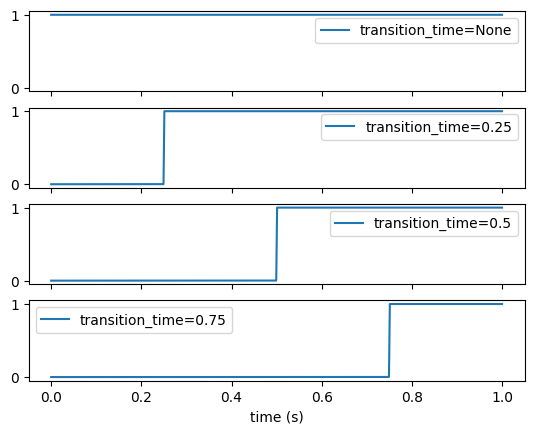

In [3]:
n = fs  # 1 second demo
t = np.arange(n) / fs

cgen0 = Constant(1)
cgen1 = Constant(1, transition_time=0.25)
cgen2 = Constant(1, transition_time=0.5)
cgen3 = Constant(1, transition_time=0.75)

fig, axes = plt.subplots(4, 1, sharex=True, sharey=True)
axes[0].plot(t, cgen0(n, force_time_axis='tile_data'), label="transition_time=None")
axes[0].legend()
axes[1].plot(t, cgen1(n), label="transition_time=0.25")
axes[1].legend()
axes[2].plot(t, cgen2(n), label="transition_time=0.5")
axes[2].legend()
axes[3].plot(t, cgen3(n), label="transition_time=0.75")
axes[3].legend()
axes[3].set_xlabel("time (s)")

A list of time points could also be assigned to `transition_time` keyword to generate an on/off sequence.


Text(0.5, 0, 'time (s)')

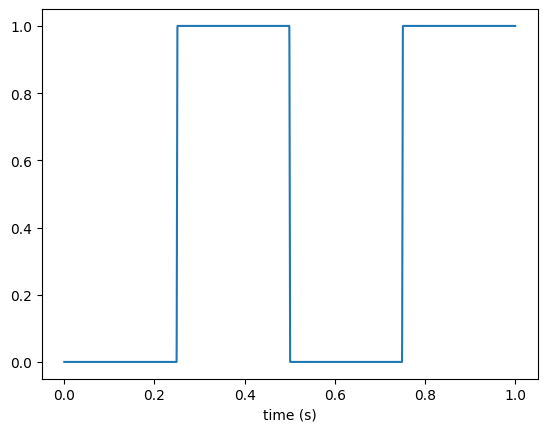

In [4]:
cgen = Constant(1, transition_time=[0.25, 0.5, 0.75])

plt.plot(t, cgen(n))
plt.xlabel("time (s)")

## `transition_time_constant` - Sets the transition duration

This parameter indicates the duration for a linear transition. Other transitions (excluding step) are slower (see below).  Default is `0.002` s, matching LeTalker's respiratory pressure (`PL`) transition.


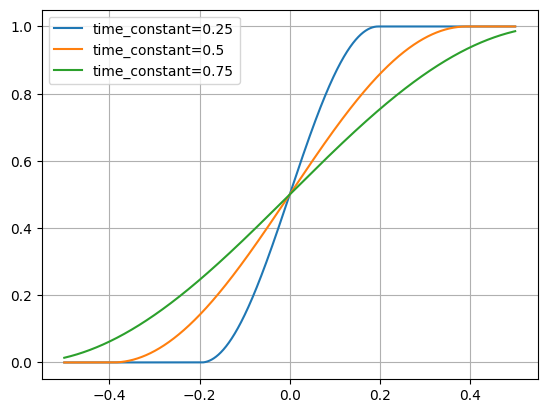

In [5]:
for tc in [0.25, 0.5, 0.75]:
    cgen = Constant(1, transition_time=0, transition_time_constant=tc)
    plt.plot(t - 0.5, cgen(n, -n // 2), label=f"time_constant={tc}")
plt.legend()
plt.grid()

## `transition_type` - Sets the transition waveform

Default is the raised cosine (`"raised_cos"`), and you may pick one of 6 possibilities:

| value | description |
| ----- | ----------- |
|`"step"` | instantaneous transition|
|`"linear"` | linear transition |
|`"raised_cos"` | raised cosine transition|
|`"exp_decay"` | transition of a first-order linear system |
|`"logistic"` | logistic function transition |
|`"atan"` | arctangent transition|
|`"tanh"` | hyperbolic tangent transition|
|`"erf"`| error function transition |


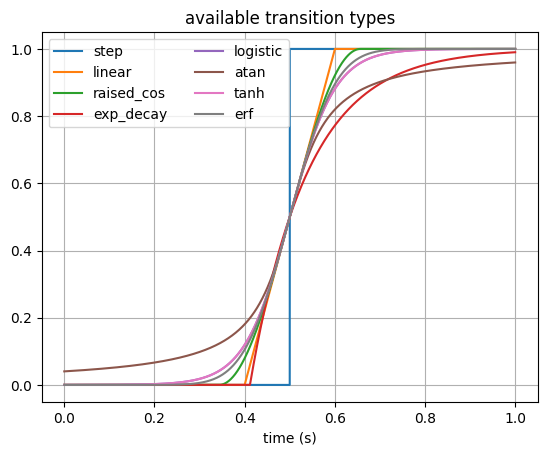

In [6]:
t = np.arange(0, n) / fs

for ttype in [
    "step",
    "linear",
    "raised_cos",
    "exp_decay",
    "logistic",
    "atan",
    "tanh",
    "erf",
]:
    cgen = Constant(
        1, transition_type=ttype, transition_time=0.5, transition_time_constant=0.2
    )
    plt.plot(t, cgen(n), label=ttype)
plt.legend(ncols=2)
plt.title("available transition types")
plt.xlabel("time (s)")
plt.grid()

## `transition_initial_on`

Setting `transition_initial_on = True` makes the first transition to turn off the signal.

Text(0.5, 0, 'time (s)')

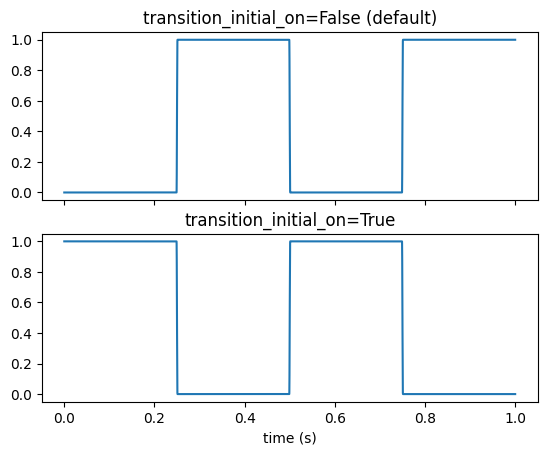

In [7]:
cgen0 = Constant(1, transition_time=[0.25, 0.5, 0.75], transition_initial_on=False)
cgen1 = Constant(1, transition_time=[0.25, 0.5, 0.75], transition_initial_on=True)

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
axes[0].plot(cgen0.ts(n), cgen0(n), label="initial_on=False (default)")
axes[0].set_title("transition_initial_on=False (default)")
axes[1].plot(cgen0.ts(n), cgen1(n), label="initial_on=True")
axes[1].set_title("transition_initial_on=True")
axes[1].set_xlabel("time (s)")